In [1]:
#Official data from Protezione Civile
urlByProvince = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
urlNational = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'

import pandas as pd
dfByProvince = pd.read_csv(urlByProvince)
dfNational = pd.read_csv(urlNational)

#dfByProvince.head(5)
#dfNational.head(5)

df={}

province=['TO','MI','LO','RM','BG','PV','PD','RI']
for p in province:
    df[p]=dfByProvince[dfByProvince['sigla_provincia']==p]

In [2]:
urlWorldWide = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

dfWorld=pd.read_csv(urlWorldWide)
dfWorld.set_index('Country/Region')
dfWorld.tail(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
416,NaN,Aruba,12.5211,-69.9683,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
417,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418,NaN,Kenya,-0.0236,37.9062,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df['TO'].tail(5)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
1995,2020-03-10 18:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,111.0
2123,2020-03-11 17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,159.0
2251,2020-03-12 17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,187.0
2379,2020-03-13 17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,305.0
2507,2020-03-14 17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,305.0


In [4]:
df['RI'].tail(5)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
1959,2020-03-10 18:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,1.0
2087,2020-03-11 17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,3.0
2215,2020-03-12 17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,2.0
2343,2020-03-13 17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,3.0
2471,2020-03-14 17:00:00,ITA,12,Lazio,57,Rieti,RI,42.404884,12.862059,3.0


In [5]:
dfNational.tail(5)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
15,2020-03-10 18:00:00,ITA,5038,877,5915,2599,8514,529,1004,631,10149,60761
16,2020-03-11 17:00:00,ITA,5838,1028,6866,3724,10590,2076,1045,827,12462,73154
17,2020-03-12 17:00:00,ITA,6650,1153,7803,5036,12839,2249,1258,1016,15113,86011
18,2020-03-13 17:00:00,ITA,7426,1328,8754,6201,14955,2116,1439,1266,17660,97488
19,2020-03-14 17:00:00,ITA,8372,1518,9890,7860,17750,2795,1966,1441,21157,109170


In [6]:
import ROOT as R
#R.enableJSVis()
R.ROOT.EnableImplicitMT()

Welcome to JupyROOT 6.18/04


In [7]:
import numpy as n

 FCN=6.20166 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=1.23891e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.88331e+01   4.98151e-01   1.41568e-06  -1.43778e-01
   2  p1           4.70425e+00   5.93982e-02   8.35458e-07   2.41140e-01
 FCN=11.655 FROM MIGRAD    STATUS=CONVERGED      87 CALLS          88 TOTAL
                     EDM=5.38692e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.62393e+01   4.82619e-01   3.05557e-06  -3.69173e-02
   2  p1           2.99843e+00   7.04594e-02   2.27960e-06   4.40382e-02
 FCN=14.9169 FROM MIGRAD    STATUS=CONVERGED     113 CALLS         114 TOTAL
                     EDM=5.886

Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/totalInfectedSummary.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/totalInfectedSummary.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/totalInfectedSummary.root has been created


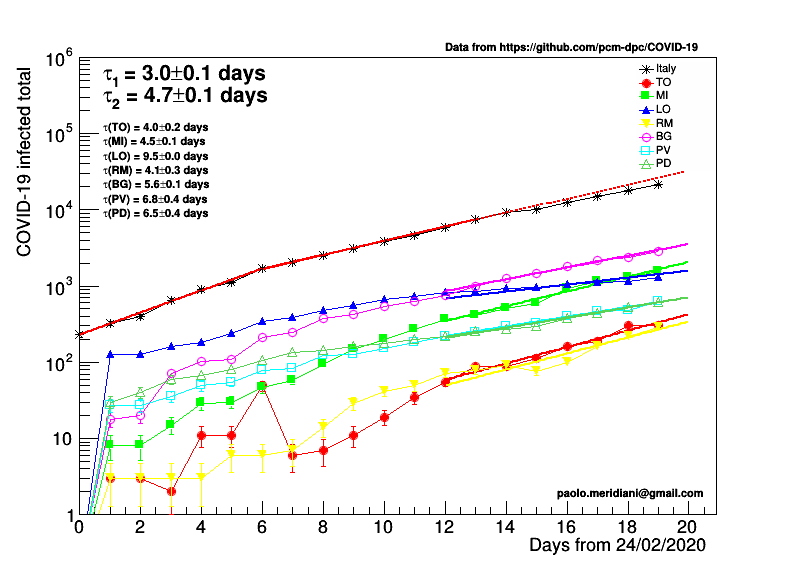

In [8]:
infected=R.TGraphErrors()
infected.SetName("infected")
for i,ni in enumerate(dfNational['totale_casi']):
    infected.SetPoint(i,i,ni)
    infected.SetPointError(i,0,R.TMath.Sqrt(ni))


infectedByProvince={}
for p in province:
    infectedByProvince[p]=R.TGraphErrors()
    infectedByProvince[p].SetName("infected_%s"%p)
    for i,ni in enumerate(df[p]['totale_casi']):
        infectedByProvince[p].SetPoint(i,i,ni)
        infectedByProvince[p].SetPointError(i,0,R.TMath.Sqrt(ni))

leg=R.TLegend(0.8,0.89,0.9,0.7)
leg.SetFillColorAlpha(0,0)
leg.SetBorderSize(0)
leg.SetTextSize(0.02)

c1=R.TCanvas("c1","c1",800,600)
infected.Draw("APL*")
infected.GetXaxis().SetTitle("Days from 24/02/2020")
infected.GetYaxis().SetTitle("COVID-19 infected total")
f=R.TF1("ff","TMath::Exp((x+[0])/[1])",0,100)
f.SetParameter(0,13)
f.SetParLimits(0,0,50)
f.SetParameter(1,3.)
f.SetParLimits(1,0.,10.)

logit=R.TF1("logit","[0]/(1+TMath::Exp(-[1]*(x-[2])))",0,100)
logit.SetParameter(0,1000)
logit.SetParLimits(0,0,10000)
logit.SetParameter(1,3)
logit.SetParLimits(1,0.,10.)
logit.SetParameter(2,5)
logit.SetParLimits(2,0.,20.)

leg.AddEntry(infected,"Italy","PL*")

t=R.TLatex()
t.SetTextSize(0.04)
infected.Fit("ff","RB+","",6,infected.GetN()-7)
t.DrawLatexNDC(0.13,0.82,"#tau_{2} = %.1f#pm%.1f days"%(f.GetParameter(1),f.GetParError(1)))
infected.Fit("ff","RB+","",0,6)
t.DrawLatexNDC(0.13,0.86,"#tau_{1} = %.1f#pm%.1f days"%(f.GetParameter(1),f.GetParError(1)))
fE=infected.GetFunction("ff").Clone('fE')
fE.SetRange(6,infected.GetN())
fE.SetLineStyle(2)
fE.Draw("SAME")
#infected.Fit("logit","RB+","",0,infected.GetN())

infected.GetYaxis().SetLimits(1,1E6)
infected.GetYaxis().SetRangeUser(1,1E6)
c1.SetLogy(1)

t.SetTextSize(0.02)

for ip,p in enumerate(province):
    if p=='RI':
        continue
    infectedByProvince[p].SetLineColor(R.kBlack+ip+1)
    infectedByProvince[p].SetMarkerColor(R.kBlack+ip+1)
    infectedByProvince[p].SetMarkerStyle(20+ip)
    infectedByProvince[p].SetMarkerSize(1.1)
    infectedByProvince[p].Draw("PLSAME")
    infectedByProvince[p].Fit("ff","RB+","",infectedByProvince[p].GetN()-8,infectedByProvince[p].GetN())
    infectedByProvince[p].GetFunction("ff").SetLineColor(R.kBlack+ip+1)
    leg.AddEntry(infectedByProvince[p],p,"PL")
    t.DrawLatexNDC(0.13,0.77-ip*0.025,"#tau(%s) = %.1f#pm%.1f days"%(p,f.GetParameter(1),f.GetParError(1)))

leg.Draw()
t.DrawLatexNDC(0.56,0.91,'Data from https://github.com/pcm-dpc/COVID-19')
t2=R.TLatex()
t2.SetTextSize(0.02)
t2.DrawLatexNDC(0.7,0.13,'paolo.meridiani@gmail.com')

c1.Draw()
for ext in ['.pdf','.png','.root']:
    c1.SaveAs("~/cernbox/www/plots/COVID19/totalInfectedSummary"+ext)


 FCN=10.5728 FROM MIGRAD    STATUS=CONVERGED     240 CALLS         241 TOTAL
                     EDM=6.15352e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.89397e+03   2.96229e+02   1.27173e-05  -9.83646e-03
   2  p1           3.33145e-01   9.25552e-03   2.79135e-06  -9.64753e-02
   3  p2           1.88773e+01   5.33377e-01   1.83875e-05  -1.89786e-04
 FCN=6.57414 FROM MIGRAD    STATUS=CONVERGED      94 CALLS          95 TOTAL
                     EDM=4.40834e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.09506e+00   4.75155e-01   6.37669e-06   3.39076e-03
   2  p1           3.26450e+00   8.76631e-02   4.10482e-06   1.06607e-02
 FCN=21.5186 FROM MIGRAD    STATU

Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/summaryNational.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/summaryNational.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/summaryNational.root has been created


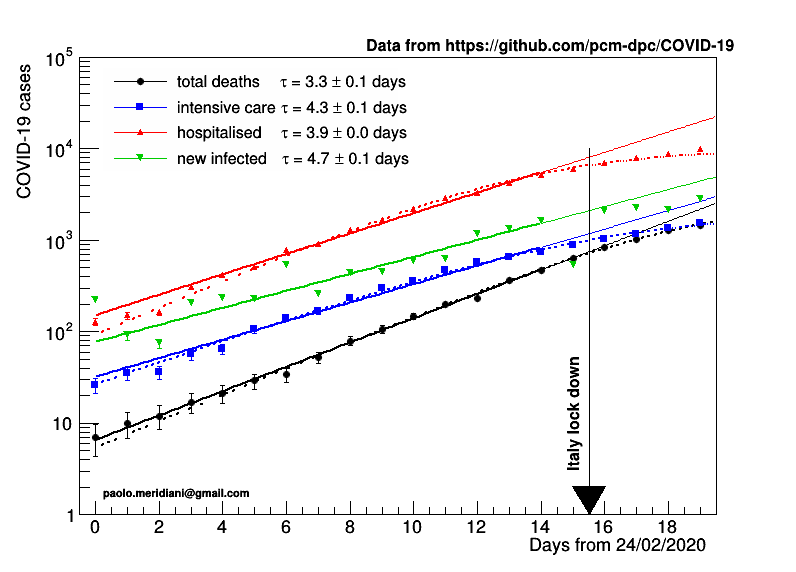

In [9]:
graphs={}
keys=["deceduti","terapia_intensiva","totale_ospedalizzati","nuovi_attualmente_positivi"]

a=R.TH2F("a","a",len(dfNational),-0.5,len(dfNational)-0.5,10,1,1E5)

R.gStyle.SetOptTitle(0)

a.GetXaxis().SetTitle("Days from 24/02/2020")
a.GetYaxis().SetTitle("COVID-19 cases")
a.SetStats(0)
a.Draw()

colors=[
    R.kBlack,
    R.kBlue,
    R.kRed,
    R.kGreen+1,
    R.kCyan,
    R.kMagenta,
    R.kOrange
]

labels={
    'deceduti':                   'total deaths   ',
    'terapia_intensiva':          'intensive care',
    'totale_ospedalizzati':       'hospitalised   ',
    'nuovi_attualmente_positivi': 'new infected  '
}

leg1=R.TLegend(0.13,0.88,0.5,0.7)
leg1.SetFillColorAlpha(0,0)
leg1.SetBorderSize(0)
leg1.SetTextSize(0.03)

fEx={}
for ik,k in enumerate(keys):
    graphs[k]=R.TGraphErrors()
    graphs[k].SetName(k)

    for i,ni in enumerate(dfNational[k]):
        graphs[k].SetPoint(i,i,dfNational[k][i])
        graphs[k].SetPointError(i,0,R.TMath.Sqrt(dfNational[k][i]))
    graphs[k].SetLineColor(colors[ik])
    graphs[k].SetMarkerColor(colors[ik])
    graphs[k].SetMarkerStyle(20+ik)
    graphs[k].SetMarkerSize(0.9)
    graphs[k].Draw("PSAME")
    if (k!= 'nuovi_attualmente_positivi'):
        graphs[k].Fit("logit","RB+")
        graphs[k].GetFunction("logit").SetLineColor(colors[ik])
        graphs[k].GetFunction("logit").SetLineStyle(3)
    graphs[k].Fit("ff","RB+","",0,graphs[k].GetN()-6)
    t.SetTextSize(0.05)
    leg1.AddEntry(graphs[k],"%s #tau = %.1f #pm %.1f days"%(labels[k],f.GetParameter(1),f.GetParError(1)),"PL")
    graphs[k].GetFunction("ff").SetLineColor(colors[ik])
    fEx[k]=graphs[k].GetFunction("ff").Clone("fEx_%s"%k)
    fEx[k].SetRange(graphs[k].GetN()-6,graphs[k].GetN()+2)
    fEx[k].SetLineWidth(1)
    fEx[k].SetLineStyle(2)
    fEx[k].SetLineColor(colors[ik])
    fEx[k].Draw("SAME")
    

ar=R.TArrow(15.5,10000,15.5,1,0.05,"|>")
ar.Draw()

t.SetTextSize(0.03)
t.DrawLatexNDC(0.46,0.91,'Data from https://github.com/pcm-dpc/COVID-19')

t1=R.TLatex()
t1.SetTextSize(0.03)
t1.SetTextAngle(90)
t1.DrawLatex(15.2,3,'Italy lock down')

leg1.Draw()
t2.DrawLatexNDC(0.13,0.13,'paolo.meridiani@gmail.com')

c1.Draw()
for ext in ['.pdf','.png','.root']:
    c1.SaveAs("~/cernbox/www/plots/COVID19/summaryNational"+ext)


In [10]:
df['Hubei']=dfWorld.loc[dfWorld['Province/State']=='Hubei']
df['Hubei']=df['Hubei'].drop(columns=['Province/State','Country/Region','Lat','Long'])
df['Hubei']=df['Hubei'].transpose()
df['Hubei'].columns=['deaths']

In [11]:
prov={
    'France':'France',
    'Germany':'',
    'Korea, South':'',
    'Spain':''
}

for country in ['France','Germany','Spain','Korea, South']:

    if (prov[country] != ''):
        df[country]=dfWorld.loc[(dfWorld['Country/Region']==country) & (dfWorld['Province/State']==prov[country])]
    else:
        df[country]=dfWorld.loc[dfWorld['Country/Region']==country]

    df[country]=df[country].drop(columns=['Province/State','Country/Region','Lat','Long'])
    df[country]=df[country].transpose()
    #df[country].tail(5)
    df[country].columns=['deaths']

 FCN=10.5728 FROM MIGRAD    STATUS=CONVERGED     242 CALLS         243 TOTAL
                     EDM=2.14034e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.89403e+03   2.96245e+02   1.27194e-05   1.57558e-02
   2  p1           3.33144e-01   9.25550e-03   2.79054e-06  -1.99181e-02
   3  p2           1.88774e+01   5.33390e-01   1.83978e-05  -8.20502e-03


Info in <TCanvas::Print>: pdf file /Users/meridian/cernbox/www/plots/COVID19/deathsItalyVsWorld.pdf has been created
Info in <TCanvas::Print>: png file /Users/meridian/cernbox/www/plots/COVID19/deathsItalyVsWorld.png has been created
Info in <TCanvas::SaveAs>: ROOT file /Users/meridian/cernbox/www/plots/COVID19/deathsItalyVsWorld.root has been created


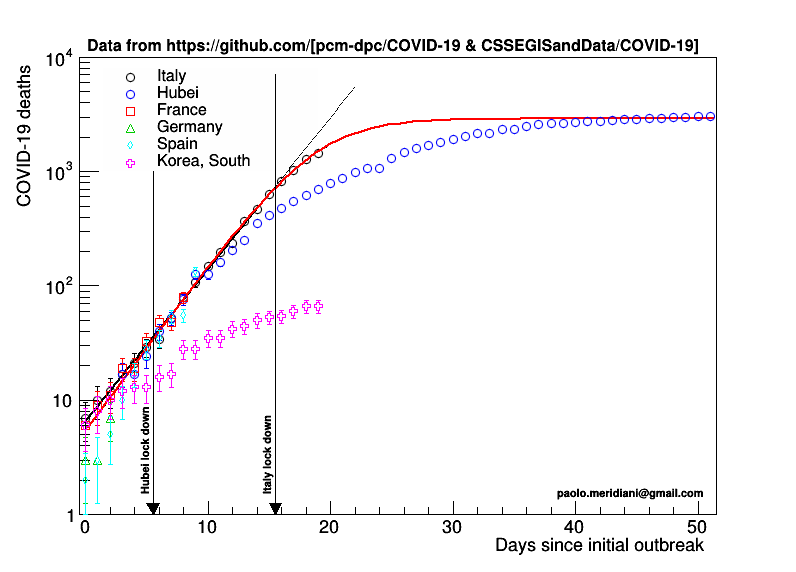

In [12]:
delay={
    'Hubei':3,
    'France':-43,
    'Spain':-42,
    'Germany':-49,
    'Korea, South':-32
}


for ic,c in enumerate(['Hubei','France','Germany','Spain','Korea, South']):
    graphs['deceduti_%s'%c]=R.TGraphErrors()
    graphs['deceduti_%s'%c].SetName('deceduti_%s'%c)

    for i,ni in enumerate(df[c]['deaths']):
        graphs['deceduti_%s'%c].SetPoint(i,i+delay[c],df[c]['deaths'][i])
        graphs['deceduti_%s'%c].SetPointError(i,0,R.TMath.Sqrt(df[c]['deaths'][i]))

        
a1=R.TH2F("a1","a1",graphs['deceduti_Hubei'].GetN(),-0.5,graphs['deceduti_Hubei'].GetN()-0.5,10,1,1E4)
a1.GetXaxis().SetTitle("Days since initial outbreak")
a1.GetYaxis().SetTitle("COVID-19 deaths")
a1.SetStats(0)
a1.Draw()

leg2=R.TLegend(0.13,0.88,0.4,0.7)
leg2.SetFillColorAlpha(0,0)
leg2.SetBorderSize(0)
leg2.SetTextSize(0.03)

fEx['deceduti'].Draw("SAME")
graphs['deceduti'].SetMarkerStyle(24)
graphs['deceduti'].SetMarkerSize(1.0)
graphs['deceduti'].SetMarkerColor(R.kBlack)
graphs['deceduti'].SetLineColor(R.kBlack)
graphs['deceduti'].Draw("PSAME")
graphs['deceduti'].Fit("logit","RB+")
leg2.AddEntry(graphs['deceduti'],"Italy","P")

         
for ic,c in enumerate(['Hubei','France','Germany','Spain','Korea, South']):
    graphs['deceduti_%s'%c].SetMarkerStyle(24+ic)
    graphs['deceduti_%s'%c].SetMarkerColor(colors[ic+1])
    graphs['deceduti_%s'%c].SetLineColor(colors[ic+1])
    graphs['deceduti_%s'%c].SetMarkerSize(1.0)
    graphs['deceduti_%s'%c].Draw("PSAME")
    #if (c=='Hubei'):
    #    graphs['deceduti_%s'%c].Fit("f2","RB+","")

    leg2.AddEntry(graphs['deceduti_%s'%c],c,"P")

t.SetTextSize(0.03)
t.DrawLatexNDC(0.11,0.91,'Data from https://github.com/[pcm-dpc/COVID-19 & CSSEGISandData/COVID-19]')
leg2.Draw()

ar1=R.TArrow(5.5,1000,5.5,1,0.02,"|>")
ar1.Draw()
ar2=R.TArrow(15.5,7000,15.5,1,0.02,"|>")
ar2.Draw()

t1.SetTextSize(0.02)
t1.DrawLatex(15.2,1.5,'Italy lock down')
t1.DrawLatex(5.2,1.5,'Hubei lock down')
t2.DrawLatexNDC(0.7,0.13,'paolo.meridiani@gmail.com')
c1.Draw()

for ext in ['.pdf','.png','.root']:
    c1.SaveAs("~/cernbox/www/plots/COVID19/deathsItalyVsWorld"+ext)